Домашнее задание 1

1. Масштабирование: а. Нормализовать признак - median_income б. Привести признак - population к масштабу от 0 до 100
2. Заполнение пропусков: а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории
3. Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [1]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import Image

Масштабирование: а. Нормализовать признак - median_income б. 

In [54]:
"""
Считываем датасет    """

houses=pd.read_csv('housing.csv')

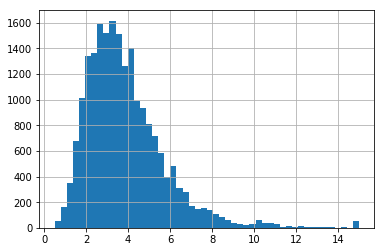

In [44]:
"""
Проверяем распределение значений по колонке "median_income" """

houses.median_income.hist(bins=50)
plt.show()

In [10]:
"""
Нормализуем данные в этом столбце с помощью метода MinMaxScaler
и запишем результат в новый стобец            """

scaler=preprocessing.MinMaxScaler()
houses['median_income_norm']=scaler.fit_transform(houses[['median_income']])

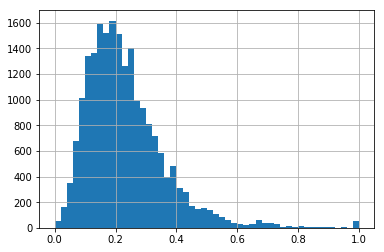

In [45]:
houses.median_income_norm.hist(bins=50)
plt.show()

б) Привести признак - population к масштабу от 0 до 100

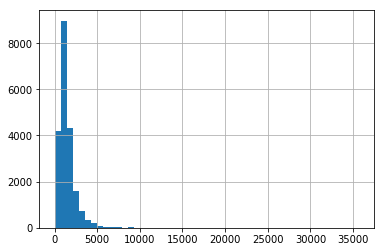

In [46]:
"""
Проверяем распределение значений по колонке "population" """

houses.population.hist(bins=50)
plt.show()

In [48]:
"""
Для масштабирования применим тот же метод, но с диапазоном 0-100 """

scaler2=preprocessing.MinMaxScaler(feature_range=[0,100])
houses['population_norm_0_100']=scaler2.fit_transform(houses[['population']])

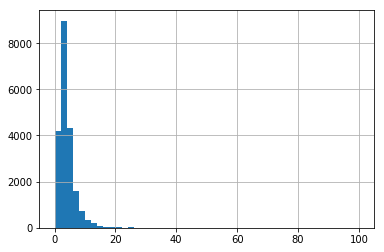

In [49]:
houses['population_norm_0_100'].hist(bins=50)
plt.show()

2. Заполнение пропусков: а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [18]:
houses2=pd.read_csv('housing.csv')
houses2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Прежде всего обращу внимание на то, что каждая строка датасета содержит обобщенную информацию не об одном домовладении, а o нескольких (иногда десятках тысяч), расположенных в пределах 1/100 градуса долготы и 1/100 градуса широты (для данной местности это территория, ограниченная прямоугольником со сторонами 1112 метров с севера на юг и 878 метров с востока на запад). Причем некоторые такие участки описываются не одной, а несколькими строками датасета.

Следовательно, значения в столбце 'total_bedrooms' означают количество спален во всех домовладениях, охваченных каждой конкретной строкой.
Отсюда также следует, что среднее значение по колонке 'total_bedrooms' не имеет смысла даже в пределах какой-либо категории "ocean_proximity", поскольку каждая строка включает от нескольких единиц до нескольких десятков тысяч домовладений.
Заполнение пропусков такими значениями может сильно исказить общую картину. Особенно, если в заполненных строках, по которым мы будем вычислять среднее значение, количество домовладений преимущественно высокое, а в строках с пропусками - количество преимущественно низкое, или наоборот

In [19]:
"""
Для примера допустим, что в каждом домовладении по 2 спальни. А в датасете каждая строка охватывает 100 домовладений, 
т.е. 200 спален. И имеется еще одна строка только с 10 домовладениями и с пропущенным значением 'total_bedrooms' """

a=[[100,200],
   [100,200],
   [100,200],
   [10, None] ]
df=pd.DataFrame(data=a, columns=['households','total_bedrooms'])
df

,households,total_bedrooms
0,100,200.0
1,100,200.0
2,100,200.0
3,10,NaN


Если в данном примере заполнить пропуск средним значением по 'total_bedrooms', то получим там 200 спален на 10 домовладений, что не соответствует действительности

Правильнее в данной ситуации выделить ту часть датасета, в которой нет пропусков по столбцу 'total_bedrooms', посмотреть общее кол-во спален и домовладений в каждой категории "ocean_proximity". Получить для каждой категории отношение общего количества спален к общему количеству домовладений. Применение полученных коэффициентов во второй части датасета (с пропусками в 'total_bedrooms') будет более точно отражать картину в целом, нежели предложенный в задании подход. Для этого в каждой строке с пропуском надо будет лишь перемножить значение "households" на коэффициент, соответствующий категории "ocean_proximity"

In [20]:
"""
Для начала выделим часть датасета без пропусков в столбце 'total_bedrooms' и сгруппируем по категории  
'ocean_proximity', считая суммы значений остальных столбцов     """

houses2=houses2[houses2['total_bedrooms'].isnull()==False]
houses2=houses2.groupby('ocean_proximity').sum()
houses2[['total_bedrooms','households']]

,total_bedrooms,households
ocean_proximity,,
<1H OCEAN,4937435.0,4674364.0
INLAND,3468095.0,3105133.0
ISLAND,2102.0,1383.0
NEAR BAY,1167195.0,1106026.0
NEAR OCEAN,1415482.0,1318018.0


In [21]:
"""
Имея суммы домовладений и спален для каждой категории, вычислим среднее кол-во спален на одно 
домовладение для каждой категории    """

def average(row):
    return row['total_bedrooms']/row['households']

In [22]:
houses2['average_rooms_to_bedrooms']=houses2.apply(average,axis=1)

In [23]:
houses2['average_rooms_to_bedrooms']

ocean_proximity
<1H OCEAN     1.056280
INLAND        1.116891
ISLAND        1.519884
NEAR BAY      1.055305
NEAR OCEAN    1.073947
Name: average_rooms_to_bedrooms, dtype: float64

In [24]:
"""
Применим эти коэффициенты для заполнения пропусков    
Сперва создам вспомогательный столбец 'check', в котором будут пометки о пропусках в 'total_bedrooms' """

houses3=pd.read_csv('housing.csv')
houses3['check']=houses3['total_bedrooms'].isnull()

In [25]:
"""
Эта функция заполнит пропуски произведением кол-ва домовладений на коэффициентдля данной категории, рассчитанный выше"""

def fill_na(row):
    if row['check']==True:
        return round(row['households']*houses2[houses2.index==row['ocean_proximity']]['average_rooms_to_bedrooms'].values[0],2)
    else:
        return row['total_bedrooms']

In [26]:
"""
Проверяем, не осталось ли пропусков в датасете  """

houses3['total_bedrooms']=houses3.apply(fill_na,axis=1)
houses3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
check                 20640 non-null bool
dtypes: bool(1), float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
"""
Проверяем, что все корректно заполнилось в конкретно взятой строке, где раньше был пропуск в 'total_bedrooms'
Новое значение равно произведению коэффициента для INLAND на кол-во домовладений: 400.96 =  359 *  1.116891  """

houses3.iloc[20046:20047]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,check
20046,-119.01,36.06,25.0,1505.0,400.96,1392.0,359.0,1.6812,47700.0,INLAND,True


3. Категорийные атрибуты: а. Посчитать среднее кол-во комнат в строке (total_rooms/households) б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [55]:
"""Для начала посчитаем, сколько в среднем комнат на домовладение.
Результат запишем в новый столбец    """

houses['average_rooms']=round(houses['total_rooms']/houses['households'],2)

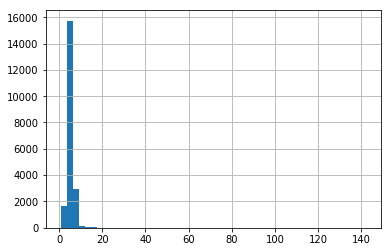

In [56]:
houses['average_rooms'].hist(bins=50)
plt.show()

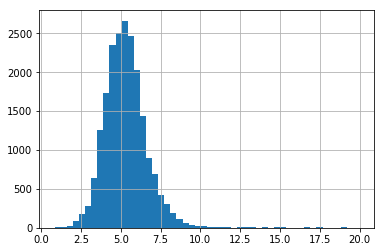

In [57]:
houses[houses['average_rooms']<=20]['average_rooms'].hist(bins=50)
plt.show()

График показывает нормальное распределение с длинным хвостом выбросов в правой части. В основном на домовладение приходится до 10 комнат. В исключительных случаях - до 150. 
В данном примере разобьем диапазон от 0 до 10 на 5 равных частей, остальные значения поместим в категорию "более 10"

In [58]:
"""
Для разбиения по категориям воспользуемся методом cut """

houses['av_rooms_cat']=pd.cut(houses['average_rooms'], \
        bins=[0,2,4,6,8,10,150], labels=['0<=rooms<2','2<=rooms<4','4<=rooms<6','6<=rooms<8','8<=rooms<10','>=10 rooms'])

In [59]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,av_rooms_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.98,6<=rooms<8
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.24,6<=rooms<8
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.29,8<=rooms<10
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.82,4<=rooms<6
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.28,6<=rooms<8


In [61]:
"""
Категории также можно выделить в отдельные столбцы с помощью метода get_dummies        """

houses_categories=pd.get_dummies(houses, columns=['av_rooms_cat'])

In [62]:
houses_categories.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,av_rooms_cat_0<=rooms<2,av_rooms_cat_2<=rooms<4,av_rooms_cat_4<=rooms<6,av_rooms_cat_6<=rooms<8,av_rooms_cat_8<=rooms<10,av_rooms_cat_>=10 rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.98,0,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.24,0,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.29,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.82,0,0,1,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.28,0,0,0,1,0,0
